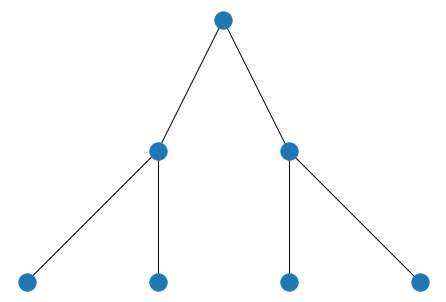

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(2, 2)

pos = graphviz_layout(T, "dot")
nx.draw(T, pos)
plt.show()

In [124]:
def binary_tree(n):
    return nx.balanced_tree(2, n)

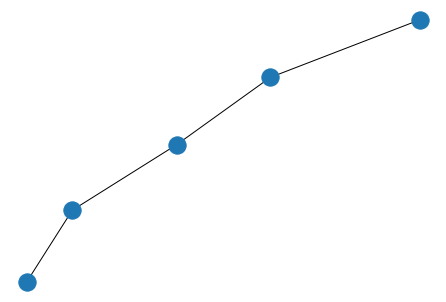

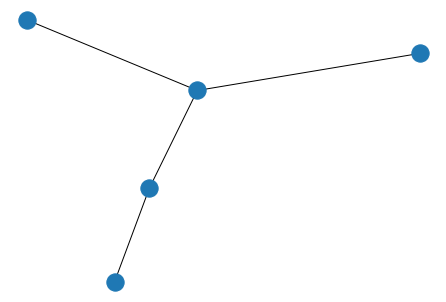

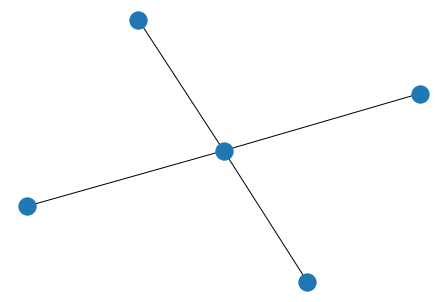

In [125]:
T = nx.nonisomorphic_trees(5)

for i, t in enumerate(T):
    plt.figure(i+1)
    pos = graphviz_layout(t)
    nx.draw(t, pos)
plt.show()

In [126]:
B = [binary_tree(i) for i in range(0, 10)]
for b in B:
    print(len(b.nodes()))

1
3
7
15
31
63
127
255
511
1023


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


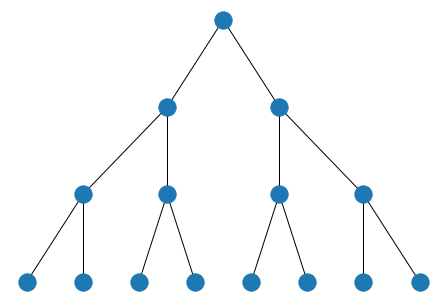

In [127]:
j=3
print(B[j].nodes())
print(nx.to_numpy_matrix(B[j]))
pos = graphviz_layout(B[j], "dot")
nx.draw(B[j], pos)
plt.show()

In [128]:
def adgacency_matrix_binary_trees_by_edge(number_edges):
    n = 2 ** (number_edges + 1) - 1
    m = np.zeros((n+1, n+1))
    m[0][n] = 1
    m[n][0] = 1

    for i in range(n//2):
        m[i][i*2+1] = 1
        m[i][i*2+2] = 1
        m[i*2+1][i] = 1
        m[i*2+2][i] = 1
    return m


In [129]:
test_n = 10
%timeit adgacency_matrix_binary_trees_by_edge(test_n)
%timeit nx.to_numpy_matrix(binary_tree(test_n))

3.11 ms ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.5 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [136]:
adgacency_matrix_binary_trees_by_edge(0)

array([[0., 1.],
       [1., 0.]])

In [174]:
class Node:
    name: str
    prop: dict
    
    def __init__(self, name, **prop):
        self.name = name
        self.prop = prop
    def __str__(self):
        return self.name

class Edge:
    name: str
    prop: dict

    def __init__(self, name, **prop):
        self.name = name
        self.prop = prop
    def __str__(self):
        return self.name


class Tree:
    trunk: Edge
    branches: list = []
    node: Node = None

    def __init__(self, name, **prop):
        self.trunk = Edge(name, **prop)
        self.branches = []
    
    def add_node(self, name, **prop):
        self.node = Node(name, **prop)

    def add_branch(self, tree):
        self.branches.append(tree)
    
    def add_branches(self, names, **prop):
        for name in names:
            self.add_branch(name, **prop)

    def get_branches(self):
        return [str(t.trunk) for t in self.branches]

def _recursive(n, name="e", depth=0):
    t = Tree(f"{name}-{depth}")
    
    if n <= 0:
        return t
    t.add_node(str(t.trunk).replace("e","v"))
    t.add_branch(_recursive(n-1, str(t.trunk), depth+1))

    return t

# T = binary_tree_class(0)




In [218]:
s = _recursive(2)

In [222]:

print(s.get_branches())
print(s.branches[0].get_branches())

['e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1-2', 'e-0-1']
['e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1', 'e-0-1-2', 'e-0-1']


In [239]:
def _recursive_dict(n, k=1, name="e", depth=0):
    t = {"name": f"{name}-{depth}", "edges": []}
    
    if n <= 0:
        return t
    
    t["edges"] = [_recursive_dict(n-1, k, t.get("name"), depth+1) for _ in range(k)]

    return t


In [240]:
_recursive_dict(1, 2)

{'name': 'e-0',
 'edges': [{'name': 'e-0-1', 'edges': []}, {'name': 'e-0-1', 'edges': []}]}